In [24]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'
import os
os.environ["KERAS_BACKEND"] = "jax"
os.environ["JAX_PLATFORMS"] = "cpu"
import sys
sys.path.append('../')
from pathlib import Path
import numpy as np
import random as rd
import utils as u
import visualizer as v
import simulation_models.modelloader as ml
import matplotlib.pyplot as plt
from collections import defaultdict
# set random seed
rd.seed(0)
np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
results_path = Path("../results/co2_posterior")

In [26]:
# find all folders with results in results_path
folders = [f.resolve() for f in results_path.iterdir() if f.is_dir() and f.name[0].isdigit()]
print(folders)
nested_dict = lambda: defaultdict(nested_dict)
parameter_draws_dict = nested_dict()
out_params_dict = nested_dict()
out_datasets_dict = nested_dict()
path_dict = nested_dict()
# load parameter draws in respective folders
for folder in folders:
    config_file = list(folder.glob("*.json"))[0]
    config = u.read_config(config_file)
    modelloader = ml.ModelLoader(config)
    model = modelloader.get_model()
    draws = u.load_draws(folder)
    out_datasets, out_params, _ = u.load_out(folder)
    out_datasets = model.scale_dict_from_model_input(out_datasets)
    out_params = model.scale_dict_from_model_input(out_params)
    draws = model.scale_dict_from_model_input(draws)
    parameter_draws_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = draws
    out_params_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_params
    out_datasets_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = out_datasets
    
    path_dict[config.surrogate][config.inference][f'sigma_a={config.bayesian_apc.prop_sigma_approx}'][f'low_budget={config.abi.low_budget}'] = folder

out_params_dict_ = out_params_dict['true_model']['abi']['sigma_a=False']['low_budget=False']

[PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-23_11-45-40'), PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-28_17-11-09'), PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-23_18-04-37'), PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-23_11-20-10'), PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-28_12-20-06'), PosixPath('/data/homes/reiser/projects/sabi/results/co2/2025-04-23_11-49-34')]


In [27]:
print(out_datasets.keys())
print(out_datasets['injection_rate'].shape)
print(out_params.keys())
print(out_params['injection_rate'].shape)
print(draws.keys())
print(draws['injection_rate'].shape)

dict_keys(['injection_rate', 'permeability', 'porosity', 'observations'])
(200, 1)
dict_keys(['injection_rate', 'permeability', 'porosity'])
(200, 1)
dict_keys(['injection_rate', 'permeability', 'porosity'])
(200, 4000, 1)


In [28]:
config.output_path = results_path
vis = v.Visualizer(config)
# vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels)
# vis.compare_posterior_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=6, labels=labels)
# vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels)

In [29]:
def get_single_comparison_data(parameter, parameter_draws_dict, out_params_dict_):
    data_to_plot = {
        'ABI': 
        {   
            "True Model": parameter_draws_dict['true_model']['abi']['sigma_a=False']['low_budget=False'][parameter],
            "True Model (Low Budget)": parameter_draws_dict['true_model']['abi']['sigma_a=False']['low_budget=True'][parameter],
            "Surrogate Model": parameter_draws_dict['bayesian_point_apc']['abi']['sigma_a=False']['low_budget=False'][parameter],
            "Uncertainty-Aware Surrogate Model": parameter_draws_dict['bayesian_apc']['abi']['sigma_a=True']['low_budget=False'][parameter]
        },
        # 'MCMC':
        # {
        #     "Surrogate Model": parameter_draws_dict['bayesian_point_apc']['mcmc']['sigma_a=False']['low_budget=False'][parameter],
        # }
    }
    out_params_dict_plot = {
        "True Model": out_params_dict_[parameter],
        "True Model (Low Budget)": out_params_dict_[parameter],
        "Surrogate Model": out_params_dict_[parameter],
        "Uncertainty-Aware Surrogate Model": out_params_dict_[parameter]
    }
    return data_to_plot, out_params_dict_plot
labels = {
    "ABI":
    {
        "True Model": "Full-budget ABI",
        "True Model (Low Budget)": "Low-budget ABI",
        "Surrogate Model": "SABI",
        "Uncertainty-Aware Surrogate Model": "UA-SABI"
    },
    # "MCMC":
    # {
    #     "Surrogate Model": "Point"
    # }
}

In [30]:
parameter_draws_dict

defaultdict(<function __main__.<lambda>()>,
            {'bayesian_point_apc': defaultdict(<function __main__.<lambda>()>,
                         {'abi': defaultdict(<function __main__.<lambda>()>,
                                      {'sigma_a=False': defaultdict(<function __main__.<lambda>()>,
                                                   {'low_budget=False': {'injection_rate': array([[[0.69746763],
                                                             [0.79810682],
                                                             [0.97131834],
                                                             ...,
                                                             [0.80554179],
                                                             [1.27552507],
                                                             [0.7857937 ]],
                                                     
                                                            [[1.18913416],
                

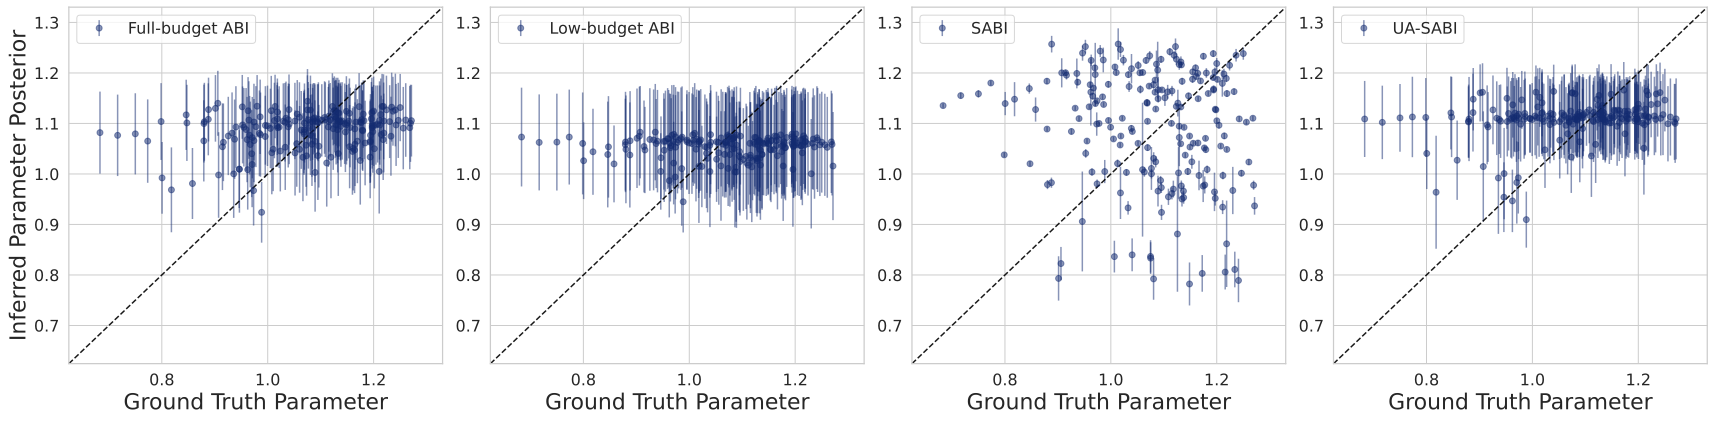

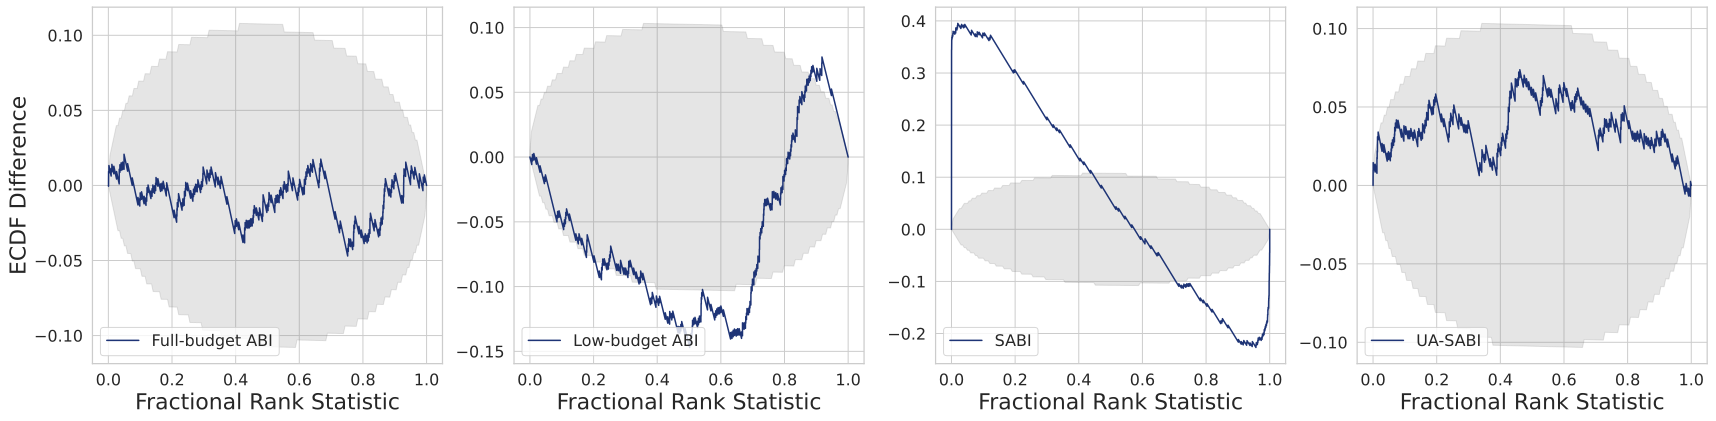

In [31]:
parameter = "injection_rate"
data_to_plot, out_params_dict_plot = get_single_comparison_data(parameter, parameter_draws_dict, out_params_dict_)

vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)

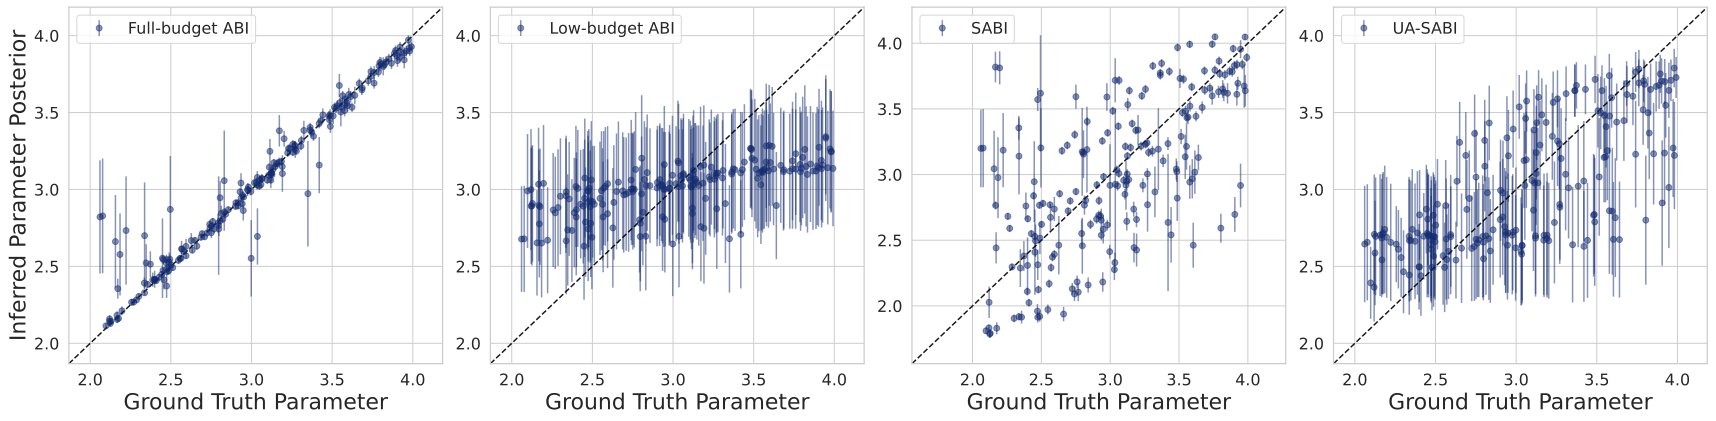

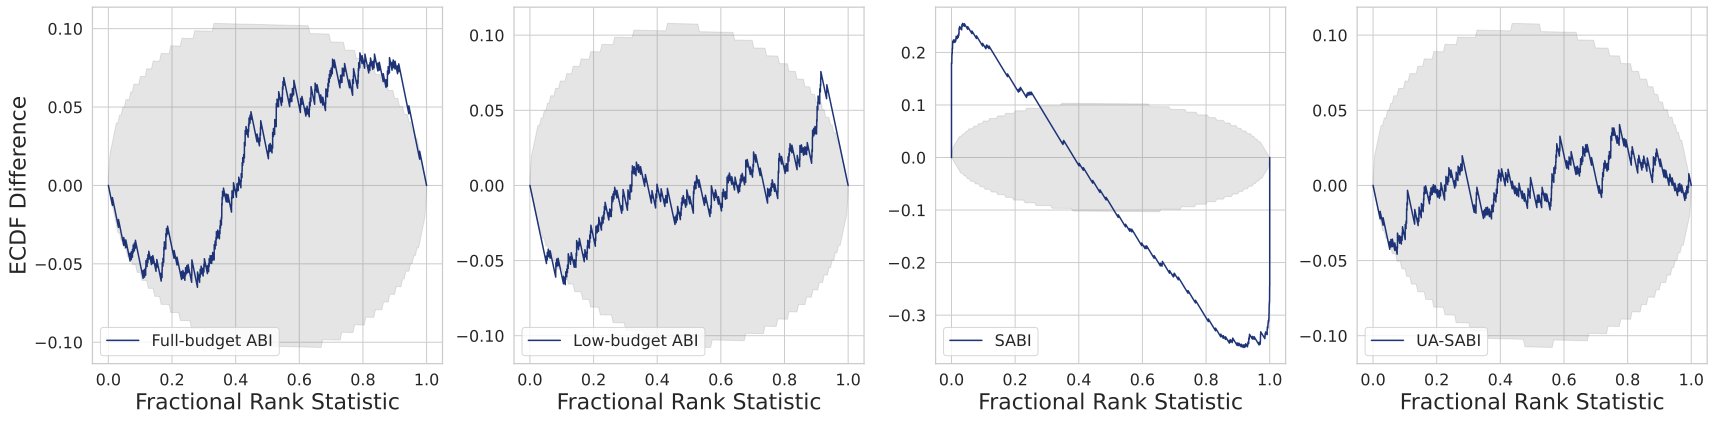

In [33]:
parameter = "permeability"
data_to_plot, out_params_dict_plot = get_single_comparison_data(parameter, parameter_draws_dict, out_params_dict_)

vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)

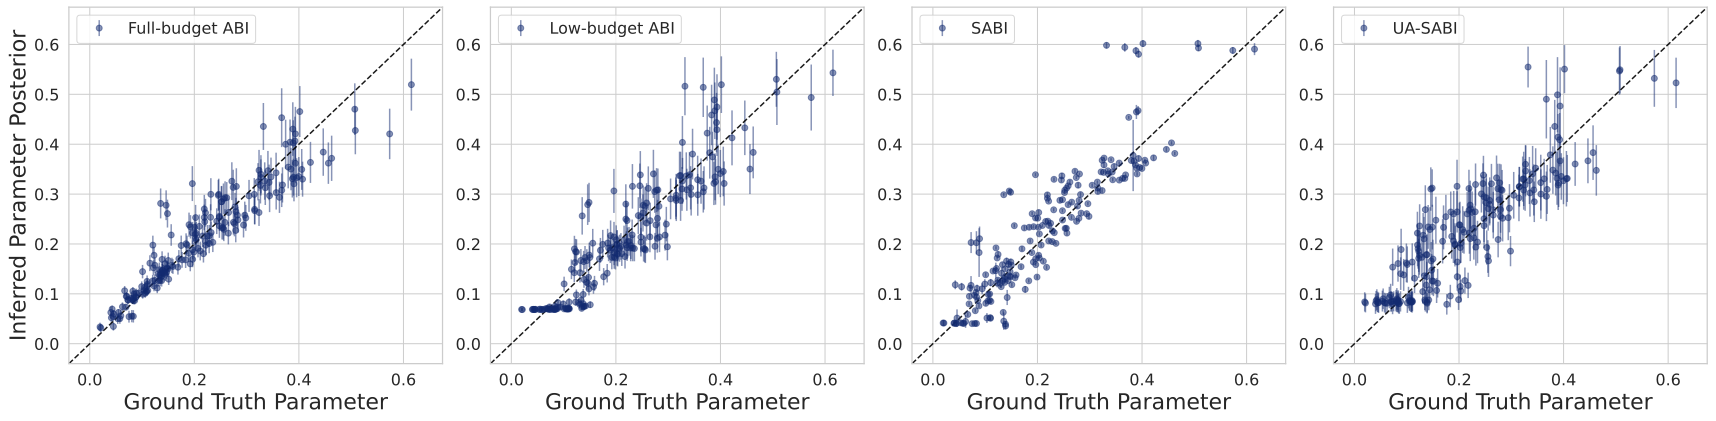

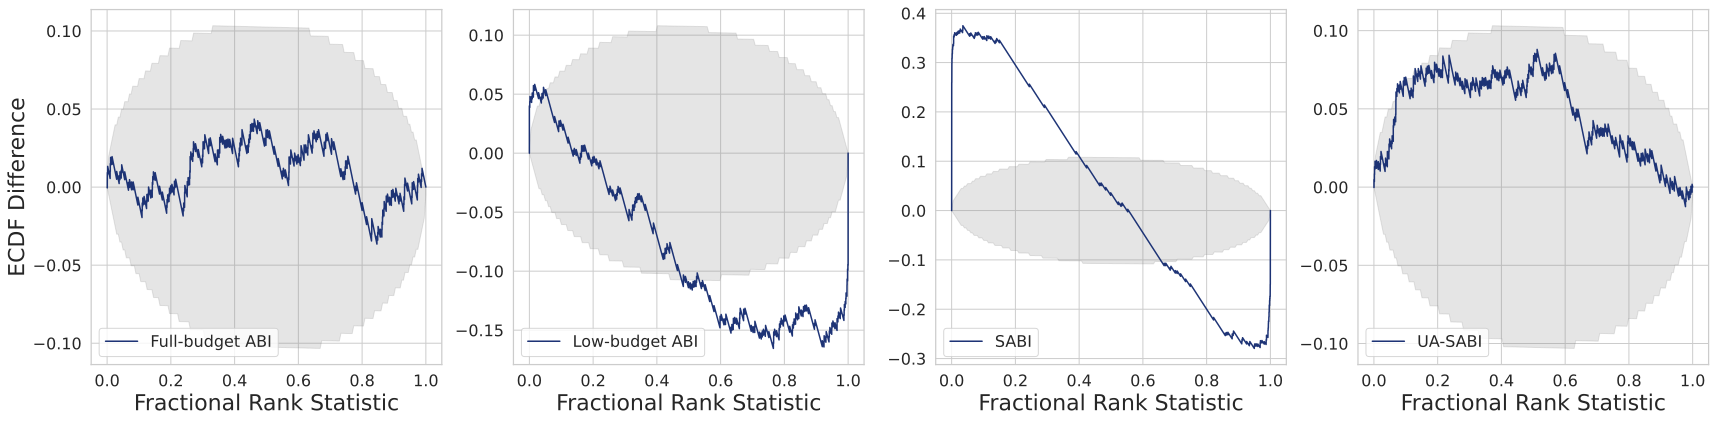

In [34]:

parameter = "porosity"
data_to_plot, out_params_dict_plot = get_single_comparison_data(parameter, parameter_draws_dict, out_params_dict_)

vis.compare_posterior_parameter_recovery(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)
vis.compare_posterior_parameter_calibration(out_params_dict_plot, data_to_plot, height=6, labels=labels, parameter_key=parameter)

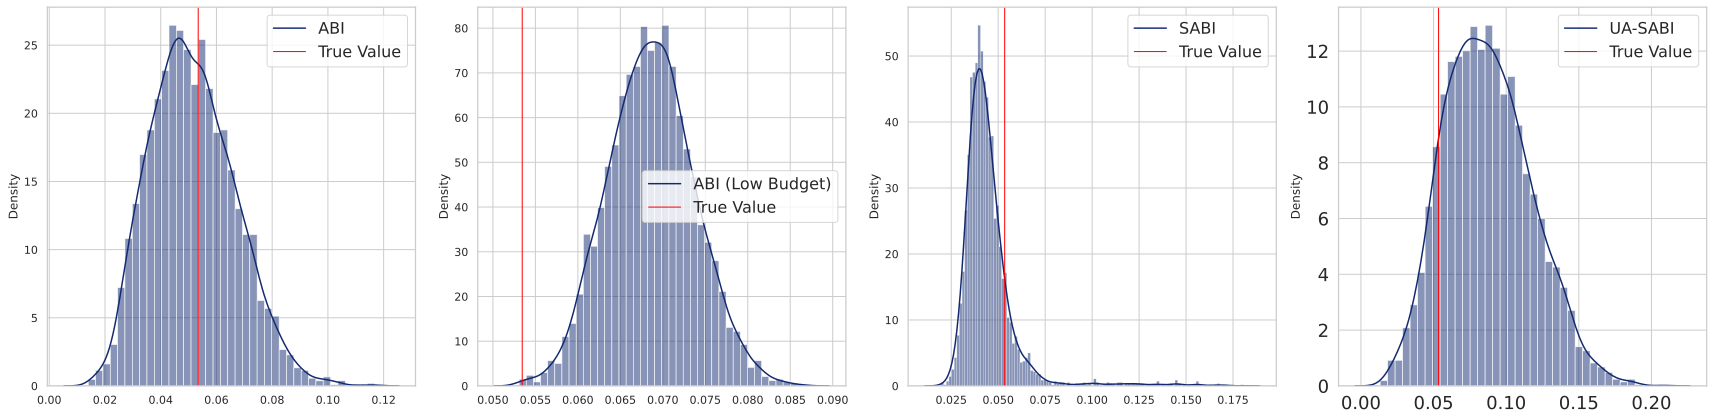

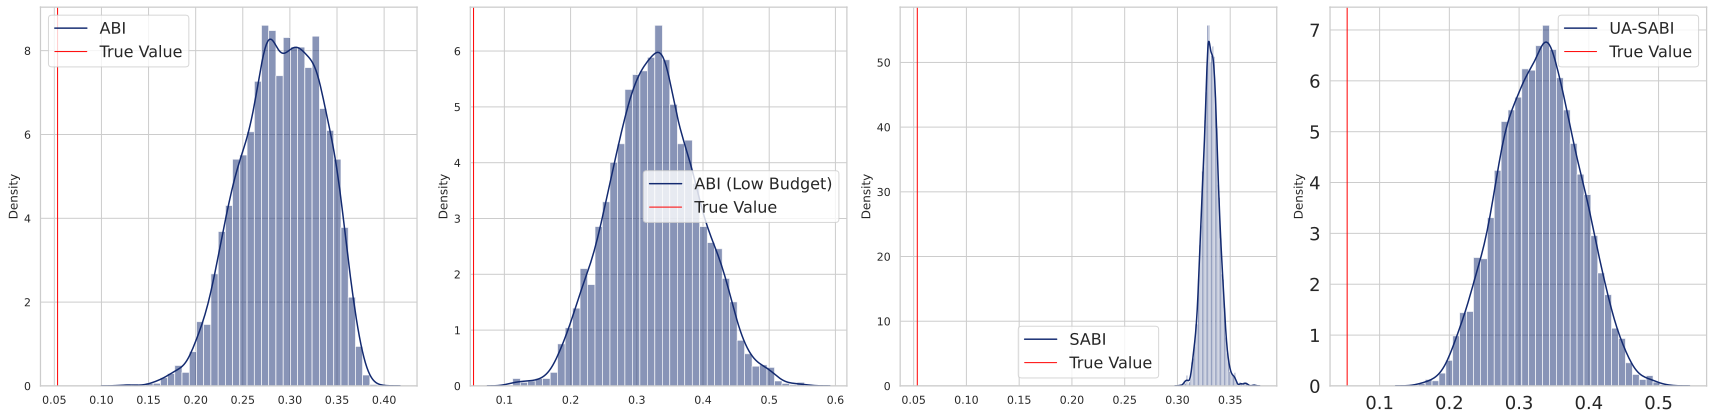

In [11]:
vis.compare_posterior_parameter_sample(out_params_dict_plot, data_to_plot,2, height=6, labels=labels, hist=True)

In [35]:
def get_nested_with_param(d, parameter):
    if parameter == "all" or parameter is None:
        return {k: v for k, v in d.items()}
    else:
        return d[parameter]

def get_mcmc_abi_comparison_data(parameter, parameter_draws_dict, out_params_dict_):
    data_to_plot = {
        "ABI": {
            "Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_point_apc']['abi']['sigma_a=False']['low_budget=False'], parameter),
            "Uncertainty-Aware Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_apc']['abi']['sigma_a=True']['low_budget=False'], parameter)
        },
        "MCMC": {
            "Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_point_apc']['mcmc']['sigma_a=False']['low_budget=False'], parameter),
            "Uncertainty-Aware Surrogate Model": get_nested_with_param(parameter_draws_dict['bayesian_apc']['mcmc']['sigma_a=True']['low_budget=False'], parameter)
        }
    }

    out_params_dict_plot = {
        "Surrogate Model": get_nested_with_param(out_params_dict_, parameter),
        "Uncertainty-Aware Surrogate Model": get_nested_with_param(out_params_dict_, parameter)
    }

    labels = {
        "ABI": {
            "Surrogate Model": "SABI",
            "Uncertainty-Aware Surrogate Model": "UA-SABI"
        },
        "MCMC": {
            "Surrogate Model": "Point",
            "Uncertainty-Aware Surrogate Model": "E-Post"
        }
    }

    return data_to_plot, out_params_dict_plot, labels

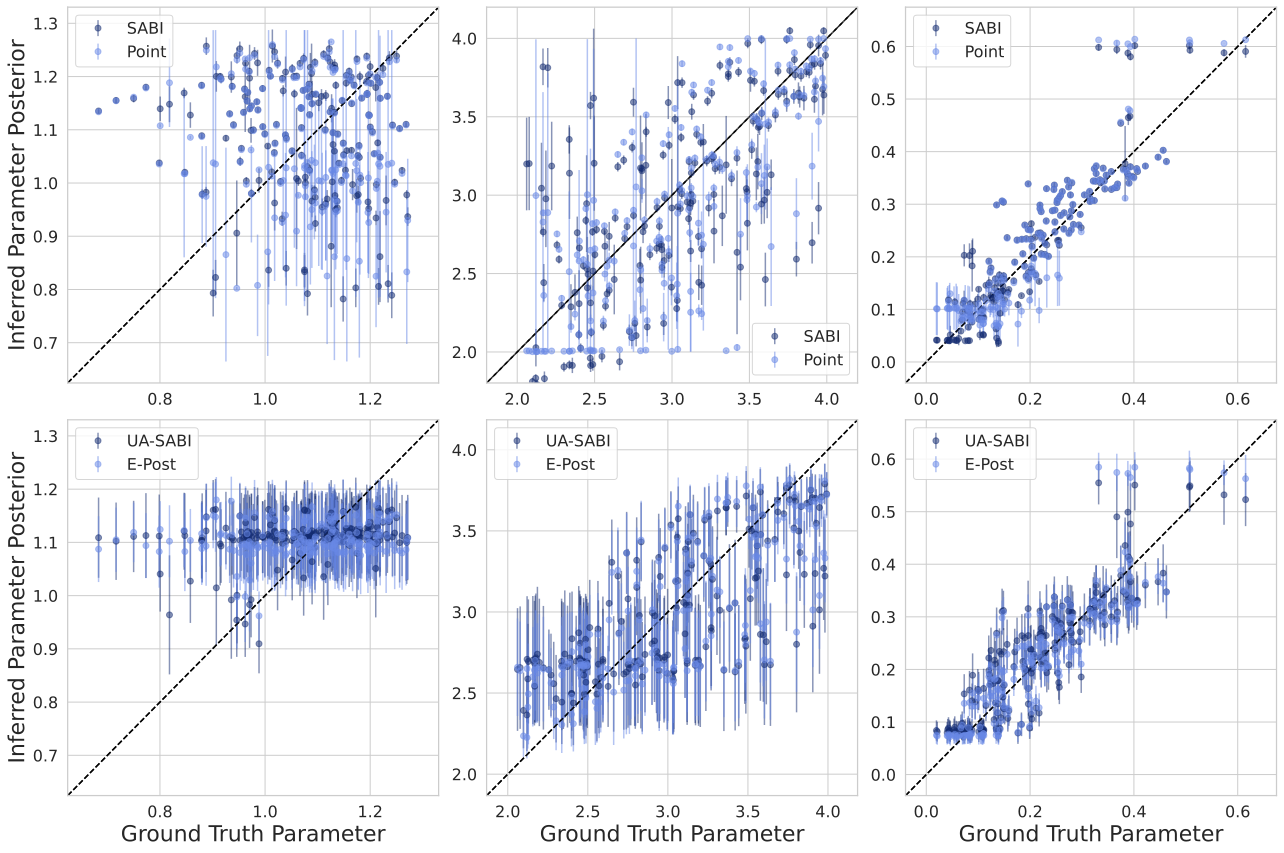

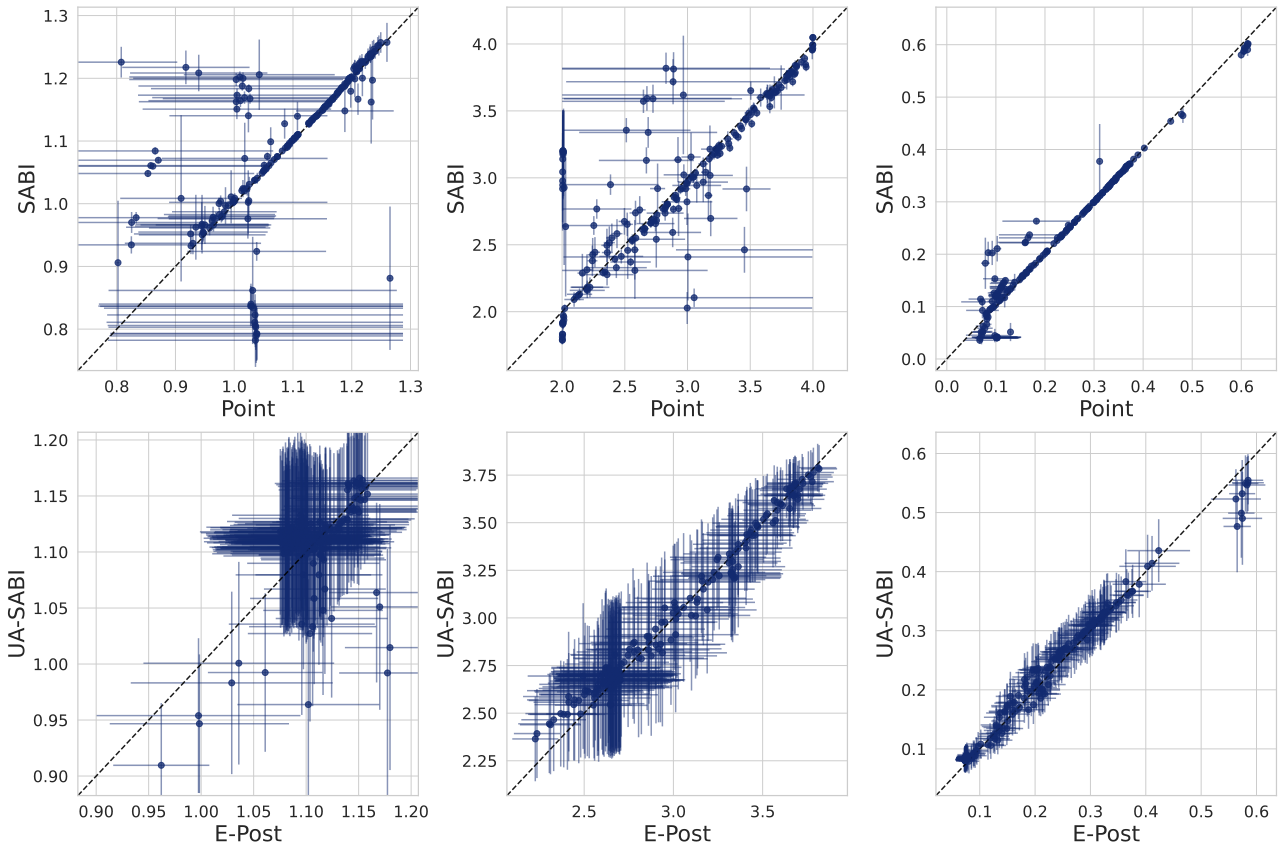

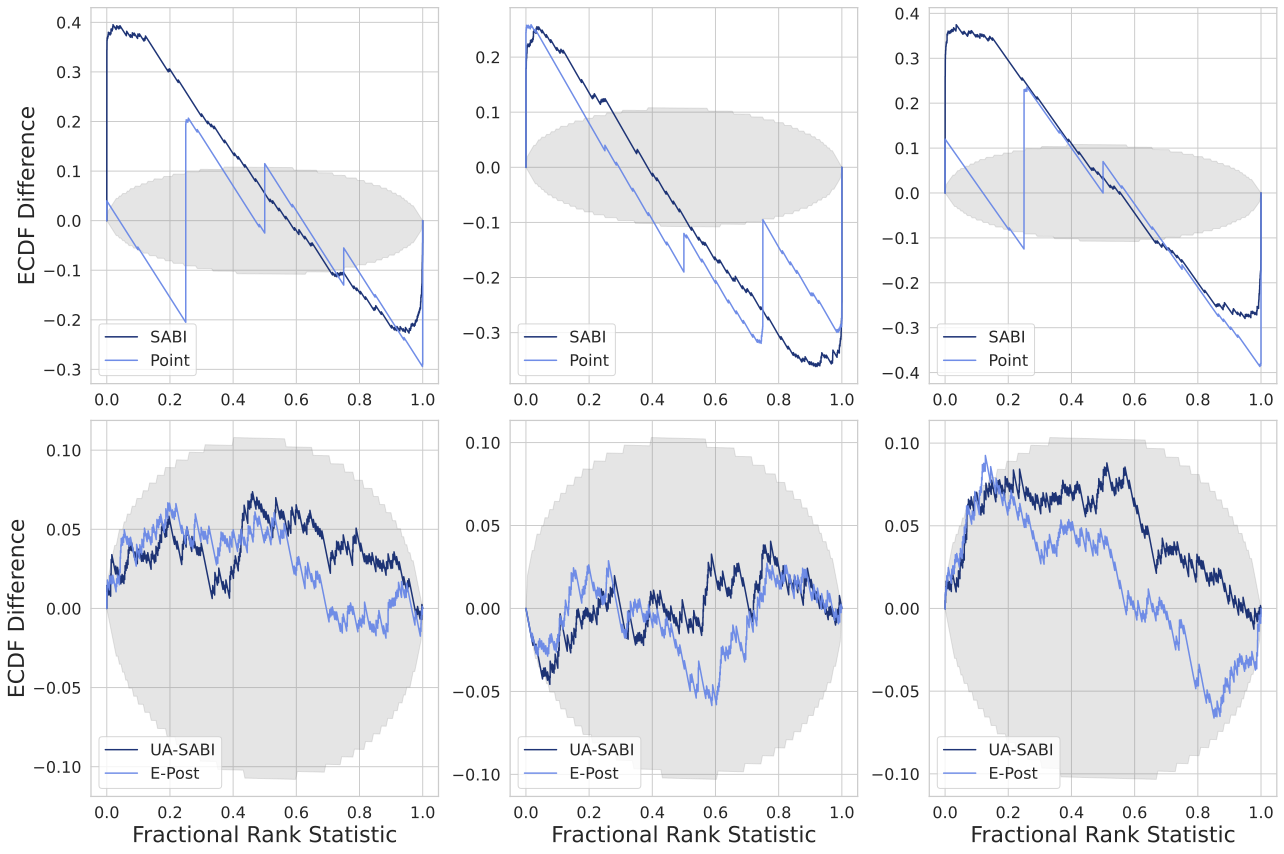

In [36]:

parameter = None
height = 6

data_to_plot, out_params_dict_plot, labels = get_mcmc_abi_comparison_data(parameter, parameter_draws_dict, out_params_dict_)

vis.compare_posterior_multi_parameter_recovery(out_params_dict_plot, data_to_plot, height=height, labels=labels)
vis.compare_posterior_multi_parameter_mcmc_abi(out_params_dict_plot, data_to_plot, height=height, labels=labels)
vis.compare_posterior_multi_parameter_calibration(out_params_dict_plot, data_to_plot, height=height, labels=labels)